In [69]:
import pandas as pd
import seaborn as sns
import ppscore as pps
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

## Regression Model


In [70]:
df = pd.read_csv("./datasets/dataset_colesterol.csv")

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     1000 non-null   object 
 2   Fumante             1000 non-null   object 
 3   Nível de Atividade  1000 non-null   object 
 4   Idade               1000 non-null   int64  
 5   Peso                1000 non-null   float64
 6   Altura              1000 non-null   int64  
 7   Colesterol          1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [72]:
df.head(10)

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33,85.1,186,199.63
1,2,A,Não,Moderado,68,105.0,184,236.98
2,3,O,Não,Alto,25,64.8,180,161.79
3,4,A,Não,Alto,43,120.2,167,336.24
4,5,AB,Não,Baixo,79,88.5,175,226.23
5,6,B,Não,Baixo,68,66.8,170,185.31
6,7,A,Sim,Baixo,60,117.3,181,289.33
7,8,O,Sim,Moderado,35,86.9,174,216.48
8,9,O,Não,Baixo,62,81.3,166,235.30
9,10,B,Sim,Alto,44,32.7,165,97.79


In [73]:
# Drop "Id" column
df.drop(columns=["Id"], axis=1, inplace=True)

# Apply OneHotEncoding on categorial columns
df = pd.get_dummies(df, columns=["Grupo Sanguíneo", "Fumante", "Nível de Atividade"])

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Idade                        1000 non-null   int64  
 1   Peso                         1000 non-null   float64
 2   Altura                       1000 non-null   int64  
 3   Colesterol                   1000 non-null   float64
 4   Grupo Sanguíneo_A            1000 non-null   uint8  
 5   Grupo Sanguíneo_AB           1000 non-null   uint8  
 6   Grupo Sanguíneo_B            1000 non-null   uint8  
 7   Grupo Sanguíneo_O            1000 non-null   uint8  
 8   Fumante_Não                  1000 non-null   uint8  
 9   Fumante_Sim                  1000 non-null   uint8  
 10  Nível de Atividade_Alto      1000 non-null   uint8  
 11  Nível de Atividade_Baixo     1000 non-null   uint8  
 12  Nível de Atividade_Moderado  1000 non-null   uint8  
dtypes: float64(2), int6

### Calculate PPS


In [75]:
# Calculate PPS matrix
pps_matrix_reg = pps.matrix(df)
pps_matrix_reg

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Idade,Idade,1.000000,predict_itself,True,None,0.0000,1.000000,None
1,Idade,Peso,0.000000,regression,True,mean absolute error,16.9691,17.814825,DecisionTreeRegressor()
2,Idade,Altura,0.000000,regression,True,mean absolute error,7.7040,7.902920,DecisionTreeRegressor()
3,Idade,Colesterol,0.000000,regression,True,mean absolute error,40.1725,42.117806,DecisionTreeRegressor()
4,Idade,Grupo Sanguíneo_A,0.000000,regression,True,mean absolute error,0.2670,0.390612,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
164,Nível de Atividade_Moderado,Fumante_Não,0.000000,regression,True,mean absolute error,0.3670,0.464239,DecisionTreeRegressor()
165,Nível de Atividade_Moderado,Fumante_Sim,0.000000,regression,True,mean absolute error,0.3670,0.464239,DecisionTreeRegressor()
166,Nível de Atividade_Moderado,Nível de Atividade_Alto,0.000000,regression,True,mean absolute error,0.2730,0.333263,DecisionTreeRegressor()
167,Nível de Atividade_Moderado,Nível de Atividade_Baixo,0.219525,regression,True,mean absolute error,0.4270,0.333263,DecisionTreeRegressor()


In [76]:
pps_matrix_reg_pivot = pps_matrix_reg.pivot(columns="x", index="y", values="ppscore")
pps_matrix_reg_pivot

x,Altura,Colesterol,Fumante_Não,Fumante_Sim,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Idade,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado,Peso
y,,,,,,,,,,,,,
Altura,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Colesterol,0.000000,1.000000,0.109942,0.109942,0.032583,0.024909,0.003366,0.065170,0.0,0.070275,0.052140,0.000000,0.490577
Fumante_Não,0.000000,0.005450,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Fumante_Sim,0.000000,0.005450,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Grupo Sanguíneo_A,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Grupo Sanguíneo_AB,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Grupo Sanguíneo_B,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Grupo Sanguíneo_O,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
Idade,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.002274,0.000000,0.001588,0.000000


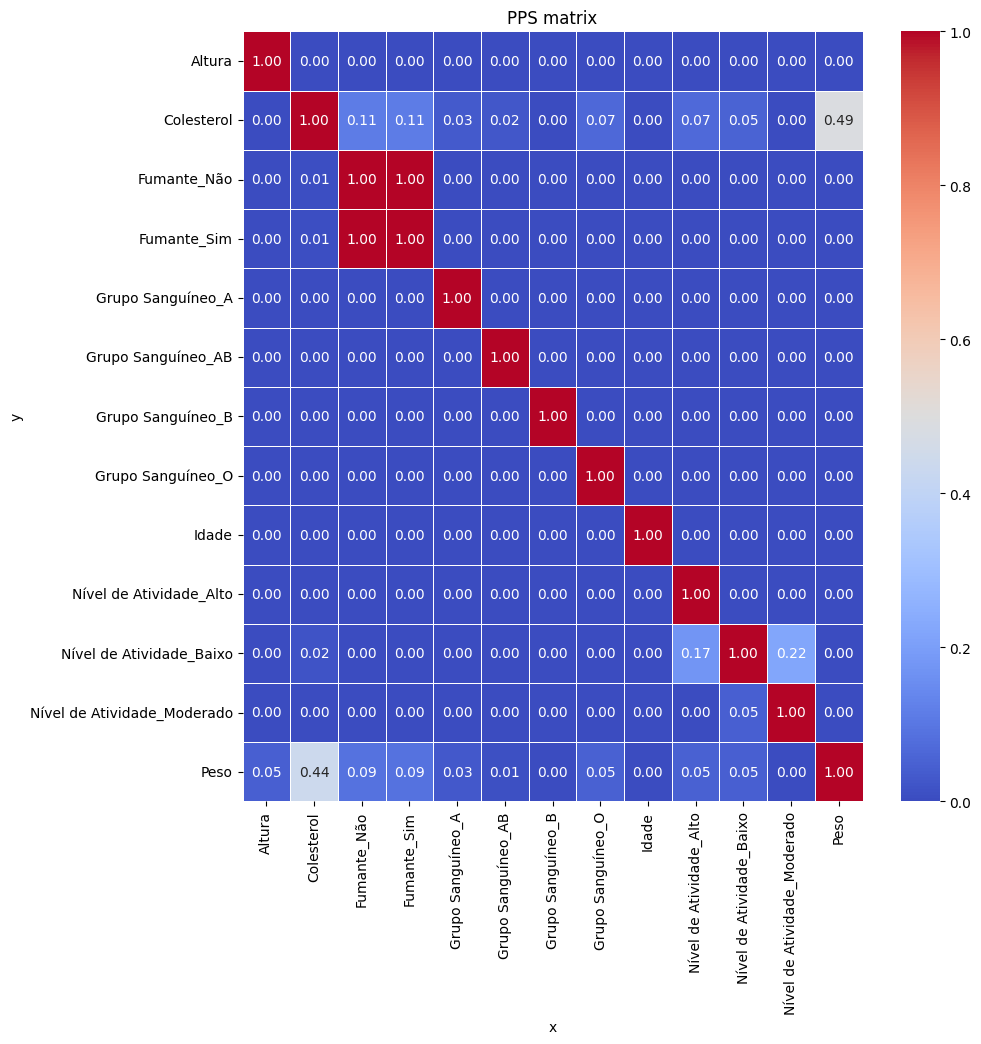

In [77]:
# Plot PPS matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    pps_matrix_reg_pivot,
    vmin=0,
    vmax=1,
    cmap="coolwarm",
    linewidths=0.5,
    annot=True,
    ax=ax,
    fmt=".2f",
)
plt.title("PPS matrix")
plt.show()

In [78]:
## Calculate PPS between two columns
pps.score(df, "Peso", "Colesterol")

{'x': 'Peso',
 'y': 'Colesterol',
 'ppscore': 0.4905771278030162,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 40.1725,
 'model_score': 20.464790333333333,
 'model': DecisionTreeRegressor()}

### Correlation Matrix


In [79]:
corr_matrix_reg = df.corr()
corr_matrix_reg

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
Idade,1.000000,-0.006532,0.010507,-0.018119,0.047091,-0.056750,0.019627,-0.005342,-0.013441,0.013441,0.064996,-0.004084,-0.058779
Peso,-0.006532,1.000000,0.380230,0.915698,0.211383,0.133803,-0.062910,-0.280042,-0.381745,0.381745,-0.281584,0.290759,-0.040099
Altura,0.010507,0.380230,1.000000,0.014046,-0.003002,-0.049044,0.027469,0.028905,-0.002448,0.002448,-0.014193,0.035030,-0.024014
Colesterol,-0.018119,0.915698,0.014046,1.000000,0.217447,0.181824,-0.082136,-0.317007,-0.424288,0.424288,-0.305578,0.304779,-0.031906
Grupo Sanguíneo_A,0.047091,0.211383,-0.003002,0.217447,1.000000,-0.366118,-0.244521,-0.416880,-0.070399,0.070399,-0.100925,0.059367,0.034035
Grupo Sanguíneo_AB,-0.056750,0.133803,-0.049044,0.181824,-0.366118,1.000000,-0.245771,-0.419010,-0.099550,0.099550,-0.068017,0.073569,-0.013287
Grupo Sanguíneo_B,0.019627,-0.062910,0.027469,-0.082136,-0.244521,-0.245771,1.000000,-0.279847,0.046184,-0.046184,0.048419,-0.053484,0.010659
Grupo Sanguíneo_O,-0.005342,-0.280042,0.028905,-0.317007,-0.416880,-0.419010,-0.279847,1.000000,0.126631,-0.126631,0.123945,-0.086124,-0.027533
Fumante_Não,-0.013441,-0.381745,-0.002448,-0.424288,-0.070399,-0.099550,0.046184,0.126631,1.000000,-1.000000,0.126632,-0.148026,0.036672
Fumante_Sim,0.013441,0.381745,0.002448,0.424288,0.070399,0.099550,-0.046184,-0.126631,-1.000000,1.000000,-0.126632,0.148026,-0.036672


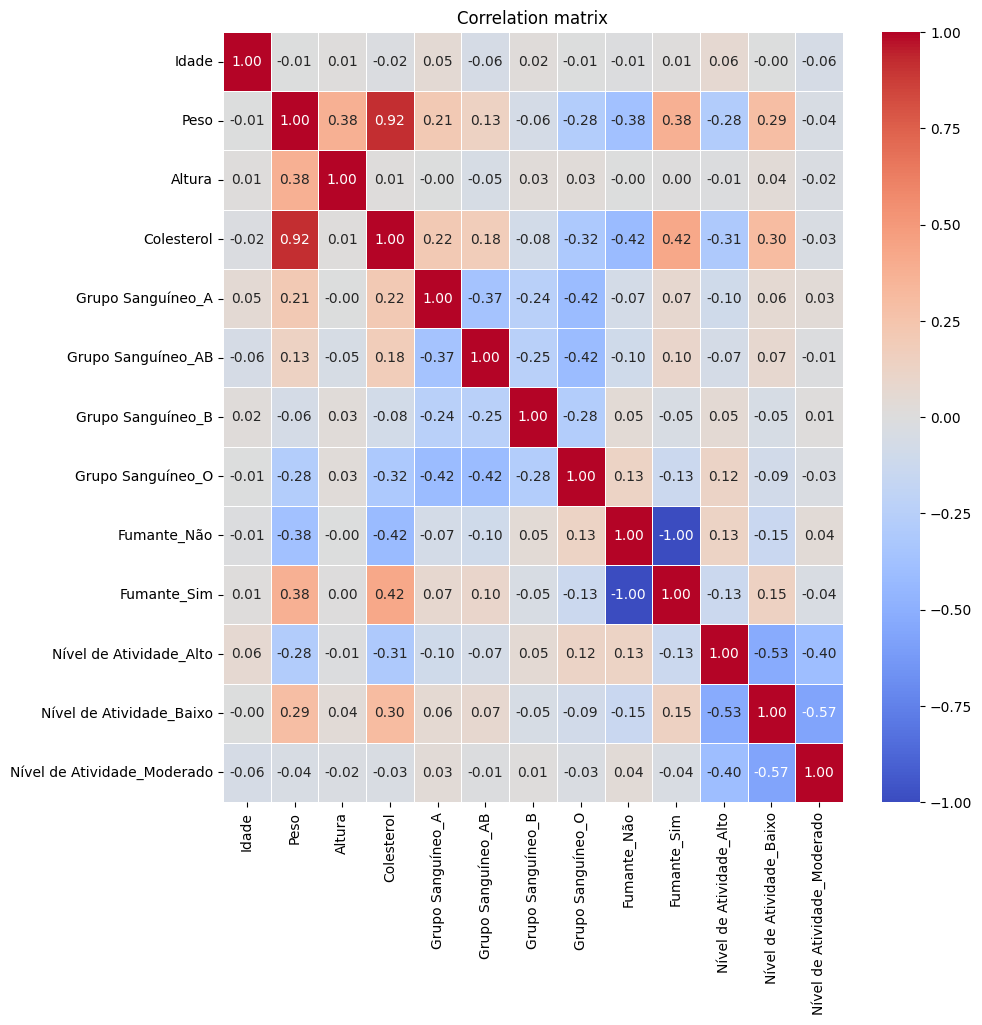

In [80]:
# Plot correlation matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    corr_matrix_reg,
    vmin=-1,
    vmax=1,
    cmap="coolwarm",
    linewidths=0.5,
    annot=True,
    ax=ax,
    fmt=".2f",
)
plt.title("Correlation matrix")
plt.show()

### Training the model


In [81]:
X = df.drop(columns=["Colesterol"])
y = df["Colesterol"]

In [82]:
model_reg = LinearRegression()
model_reg.fit(X, y)

LinearRegression()

Text(0, 0.5, 'Feature')

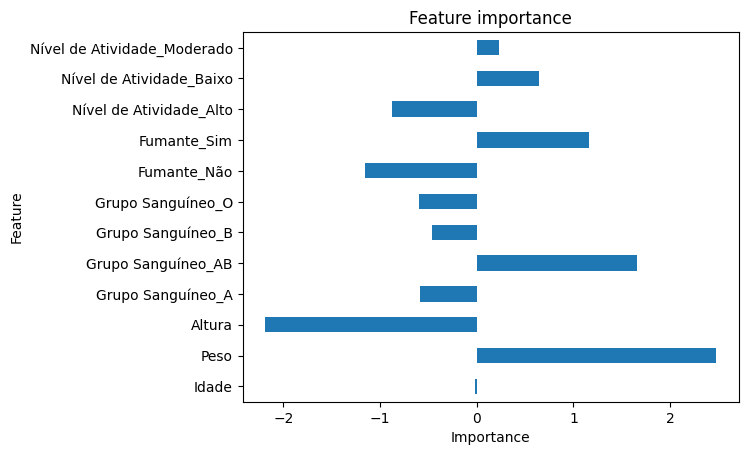

In [83]:
feature_importance_class = pd.Series(model_reg.coef_, index=X.columns)
feature_importance_class.plot(kind="barh")
plt.title("Feature importance")
plt.xlabel("Importance")
plt.ylabel("Feature")

## Classification Model


In [84]:
df = pd.read_csv("./datasets/fruit_quality.csv")

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [86]:
# Drop "A_id" column
df.drop(columns=["A_id"], axis=1, inplace=True)

# Convert "Quality" column to binary
df["Quality"] = df["Quality"].apply(lambda x: 1 if x == "good" else 0)

In [87]:
df.head(10)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,0
6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,1
7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,1
8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,0
9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,0


### Calculate PPS


In [88]:
# Calculate PPS matrix
pps_matrix_class = pps.matrix(df)
pps_matrix_class

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Size,Size,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Size,Weight,0.000000,regression,True,mean absolute error,1.255674,1.814665,DecisionTreeRegressor()
2,Size,Sweetness,0.000000,regression,True,mean absolute error,1.536197,2.078989,DecisionTreeRegressor()
3,Size,Crunchiness,0.000000,regression,True,mean absolute error,1.095270,1.538555,DecisionTreeRegressor()
4,Size,Juiciness,0.000000,regression,True,mean absolute error,1.542205,2.160981,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
59,Quality,Crunchiness,0.000000,regression,True,mean absolute error,1.095270,1.096059,DecisionTreeRegressor()
60,Quality,Juiciness,0.037673,regression,True,mean absolute error,1.542205,1.484105,DecisionTreeRegressor()
61,Quality,Ripeness,0.027576,regression,True,mean absolute error,1.491283,1.450159,DecisionTreeRegressor()
62,Quality,Acidity,0.000000,regression,True,mean absolute error,1.689354,1.690692,DecisionTreeRegressor()


In [89]:
pps_matrix_class_pivot = pps_matrix_class.pivot(
    columns="x", index="y", values="ppscore"
)
pps_matrix_class_pivot

x,Acidity,Crunchiness,Juiciness,Quality,Ripeness,Size,Sweetness,Weight
y,,,,,,,,
Acidity,1.0,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000
Crunchiness,0.0,1.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000
Juiciness,0.0,0.000000,1.0000,0.037673,0.00000,0.000000,0.000000,0.000000
Quality,0.0,0.053106,0.1002,1.000000,0.09018,0.035822,0.086172,0.043337
Ripeness,0.0,0.000000,0.0000,0.027576,1.00000,0.000000,0.000000,0.000000
Size,0.0,0.000000,0.0000,0.034400,0.00000,1.000000,0.000000,0.000000
Sweetness,0.0,0.000000,0.0000,0.023585,0.00000,0.000000,1.000000,0.000000
Weight,0.0,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,1.000000


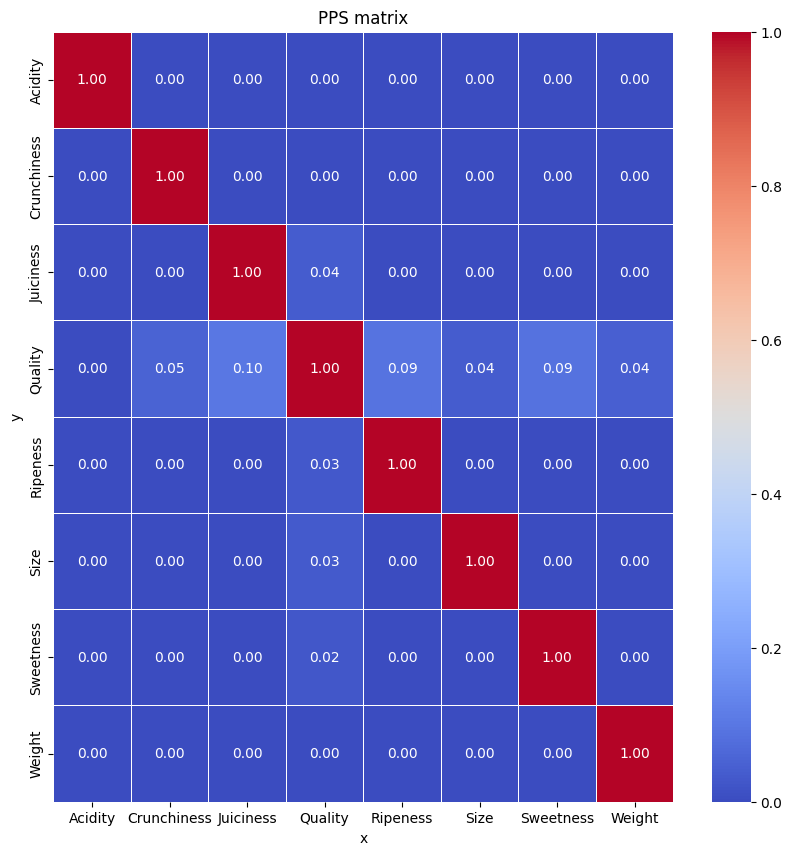

In [90]:
# Plot PPS matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    pps_matrix_class_pivot,
    vmin=0,
    vmax=1,
    cmap="coolwarm",
    linewidths=0.5,
    annot=True,
    ax=ax,
    fmt=".2f",
)
plt.title("PPS matrix")
plt.show()

In [91]:
## Calculate PPS between two columns
pps.score(df, "Peso", "Colesterol")

ValueError: The 'x' argument should be the name of a dataframe column but the variable that you passed is not a column in the given dataframe.
Please review the column name or your dataframe

### Correlation Matrix


In [62]:
corr_matrix_class = df.corr()
corr_matrix_class

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218,0.244007
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414,0.001421
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999,0.250998
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943,-0.012376
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714,0.260223
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669,-0.264315
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000,-0.007697
Quality,0.244007,0.001421,0.250998,-0.012376,0.260223,-0.264315,-0.007697,1.000000


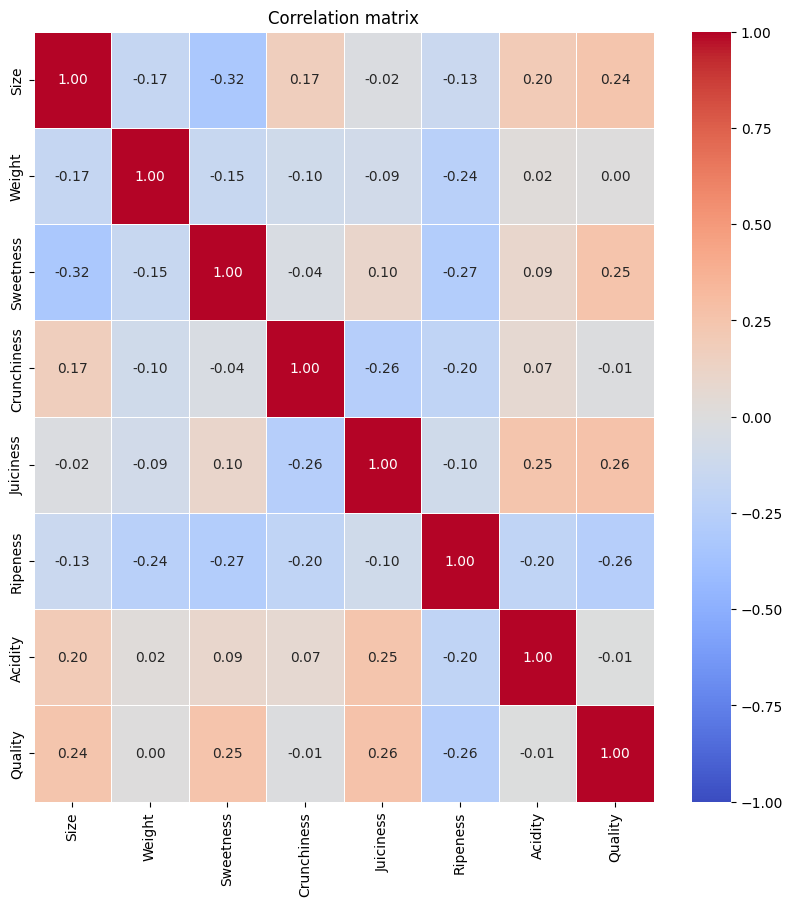

In [63]:
# Plot correlation matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    corr_matrix_class,
    vmin=-1,
    vmax=1,
    cmap="coolwarm",
    linewidths=0.5,
    annot=True,
    ax=ax,
    fmt=".2f",
)
plt.title("Correlation matrix")
plt.show()

### Training the model


In [64]:
X = df.drop(columns=["Quality"])
y = df["Quality"]

In [66]:
model_class = LogisticRegression()
model_class.fit(X, y)

LogisticRegression()

Text(0, 0.5, 'Feature')

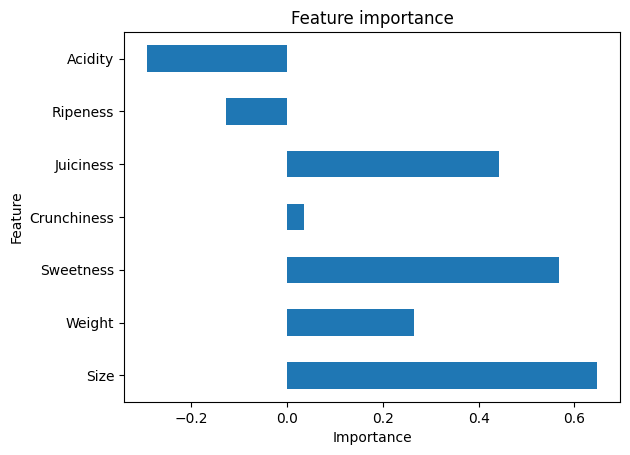

In [68]:
feature_importance_class = pd.Series(model_class.coef_[0], index=X.columns)
feature_importance_class.plot(kind="barh")
plt.title("Feature importance")
plt.xlabel("Importance")
plt.ylabel("Feature")